In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

data = pd.read_csv('Data.csv')

In [6]:
data.describe()
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             1552 non-null   int64  
 1   Std             1552 non-null   object 
 2   ID              1552 non-null   object 
 3   Material        1552 non-null   object 
 4   Heat treatment  802 non-null    object 
 5   Su              1552 non-null   int64  
 6   Sy              1552 non-null   object 
 7   A5              1346 non-null   float64
 8   Bhn             463 non-null    float64
 9   E               1552 non-null   int64  
 10  G               1552 non-null   int64  
 11  mu              1552 non-null   float64
 12  Ro              1552 non-null   int64  
 13  pH              193 non-null    float64
 14  Desc            981 non-null    object 
 15  HV              165 non-null    float64
dtypes: float64(5), int64(5), object(6)
memory usage: 194.1+ KB


,Sno,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
1547,1548,JIS,512A80EC21EA416BA2725B38BA8096EF,Nodular cast iron,NaN,600,370,NaN,NaN,169000,70000,0.20,7160,480.0,Nodular cast iron,210.0
1548,1549,JIS,38526441BA8741CA979DBF870D0B8A9B,Nodular cast iron,NaN,700,420,NaN,NaN,169000,70000,0.20,7160,560.0,Nodular cast iron,230.0
1549,1550,JIS,CAC03D7EB1AA45E68EFF92A2EF4C3D9B,Nodular cast iron,NaN,800,480,NaN,NaN,169000,70000,0.20,7160,600.0,Nodular cast iron,240.0
1550,1551,JIS,45C82A36EC644F8BB6170A99ED819B62,Malleable cast iron,NaN,400,180,4.0,NaN,160000,64000,0.27,7160,300.0,Malleable cast iron,220.0
1551,1552,JIS,BC74F870412F4DDBADDEF1063C1C079F,Malleable cast iron,NaN,500,260,4.0,NaN,160000,64000,0.27,7160,370.0,Malleable cast iron,230.0


In [2]:
import matplotlib.pyplot as plt

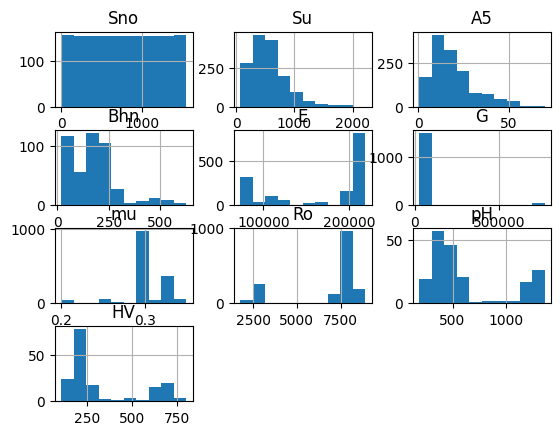

In [10]:
data.hist()
plt.show()

# Feature engineering
# Create new features based on existing ones
data["Super"] = data["Material"] + data["Std"]

# Select relevant features for modeling
features = ["Material", "Std", "Super"]
target = "Sy"

# Prepare the data for modeling
X = data[features]
y = data[target]

In [4]:
print(data.head())

print(data.isnull().sum())

for column in data.columns:
    print(data[column].unique())

   Sno   Std                                ID        Material Heat treatment  \
0    1  ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015      as-rolled   
1    2  ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015     normalized   
2    3  ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015       annealed   
3    4  ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020      as-rolled   
4    5  ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020     normalized   

    Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0  421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1  424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2  386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3  448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4  441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
Sno                  0
Std                  0
ID                   0
Material             0
Heat tr

In [3]:
encoder = LabelEncoder()
data['Material'] = encoder.fit_transform(data['Material'])
data

,Sno,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
0,1,ANSI,D8894772B88F495093C43AF905AB6373,1126,as-rolled,421,314,39.0,126.0,207000,79000,0.30,7860,NaN,NaN,NaN
1,2,ANSI,05982AC66F064F9EBC709E7A4164613A,1126,normalized,424,324,37.0,121.0,207000,79000,0.30,7860,NaN,NaN,NaN
2,3,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,1126,annealed,386,284,37.0,111.0,207000,79000,0.30,7860,NaN,NaN,NaN
3,4,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,1127,as-rolled,448,331,36.0,143.0,207000,79000,0.30,7860,NaN,NaN,NaN
4,5,ANSI,DCE10036FC1946FC8C9108D598D116AD,1127,normalized,441,346,35.8,131.0,207000,79000,0.30,7860,550.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1548,JIS,512A80EC21EA416BA2725B38BA8096EF,963,NaN,600,370,NaN,NaN,169000,70000,0.20,7160,480.0,Nodular cast iron,210.0
1548,1549,JIS,38526441BA8741CA979DBF870D0B8A9B,963,NaN,700,420,NaN,NaN,169000,70000,0.20,7160,560.0,Nodular cast iron,230.0
1549,1550,JIS,CAC03D7EB1AA45E68EFF92A2EF4C3D9B,963,NaN,800,480,NaN,NaN,169000,70000,0.20,7160,600.0,Nodular cast iron,240.0
1550,1551,JIS,45C82A36EC644F8BB6170A99ED819B62,860,NaN,400,180,4.0,NaN,160000,64000,0.27,7160,300.0,Malleable cast iron,220.0


In [4]:
data.shape

(1552, 16)

In [6]:
data['Su'].max()

2220

In [7]:
data['mu'].max()

0.35

In [8]:
data['Sy'].max()

'981'

In [10]:
data['pH'].max()

1360.0

In [11]:
data['G'].max()

769000

In [12]:
data['Bhn'].max()

627.0

In [17]:
data['A5'].max()

70.0

In [18]:
data['E'].max()

219000

In [19]:
data['HV'].max()

800.0

In [20]:
data['Ro'].max()

8930

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
df=data
y = df['Sno']
X = df.drop(['Sno'],axis=1)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [24]:
X_train.shape

(1039, 15)

In [25]:
X_test.shape

(513, 15)

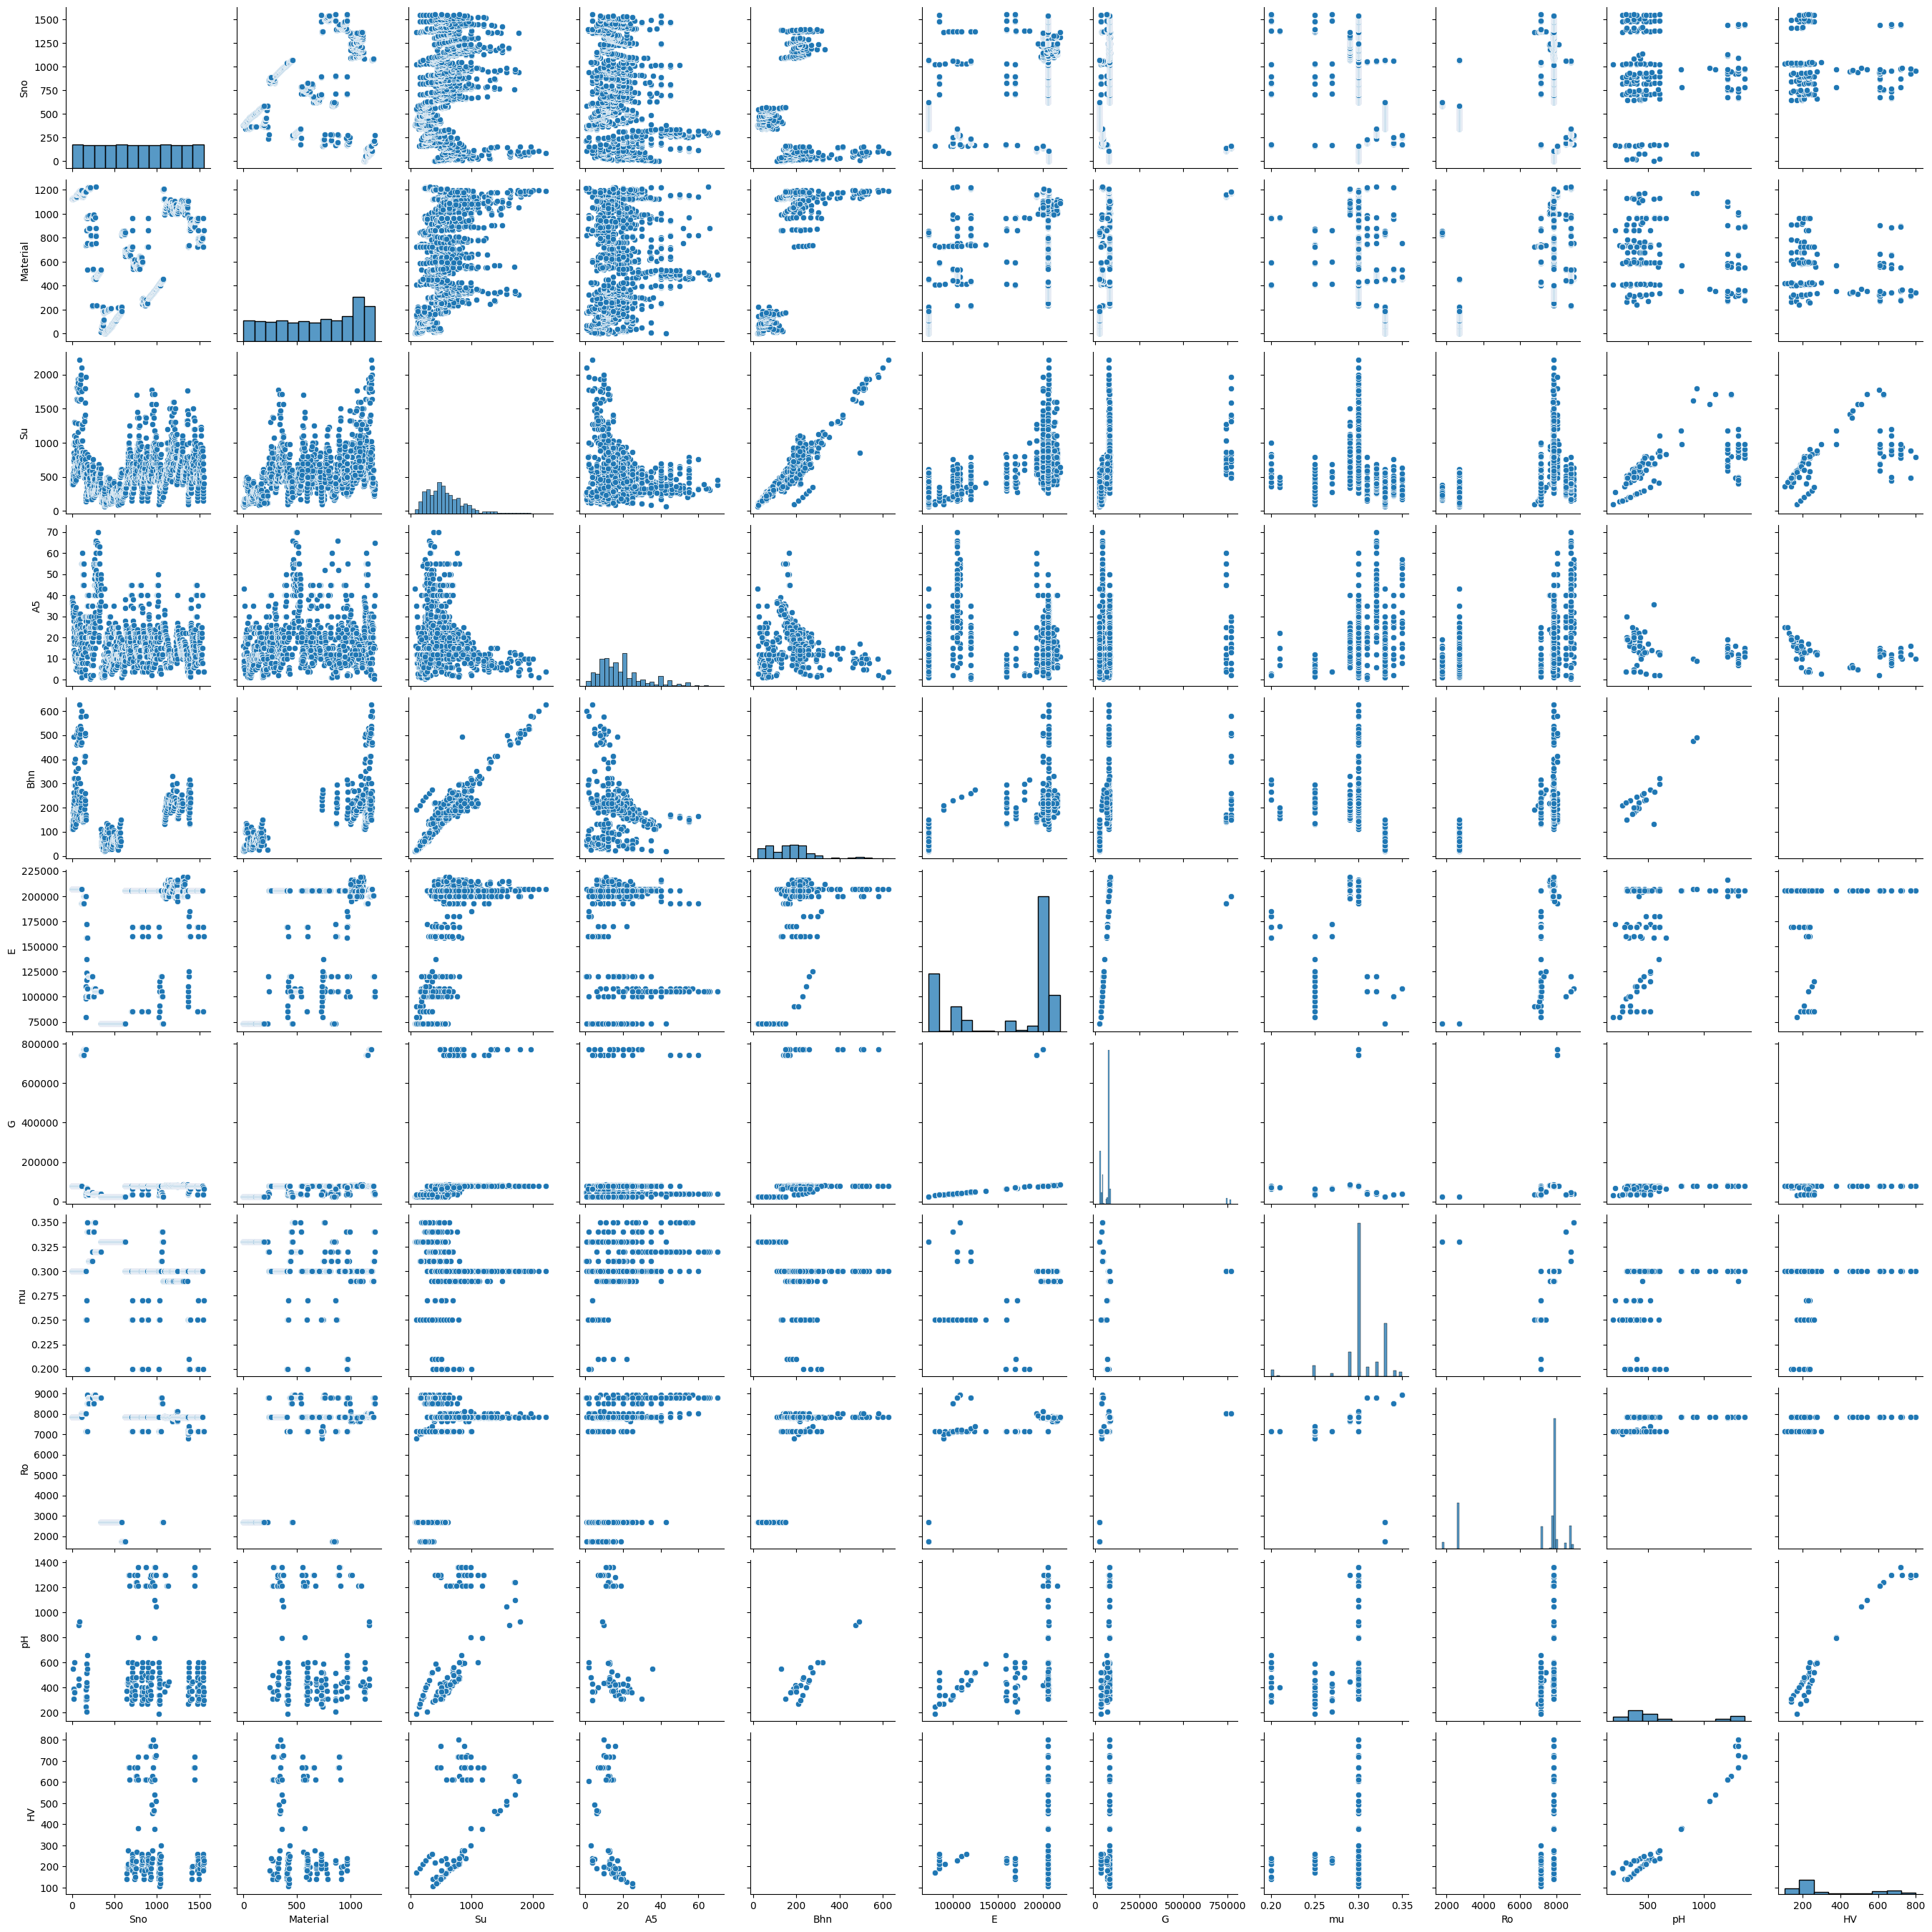

In [30]:
sns.pairplot(data)

In [26]:
data = pd.read_csv("data.csv")
print(data.head())
aggregation_functions = {
    'Ro': ['mean', 'median', 'max', 'min'],
    'G': ['mean', 'median', 'max', 'min'],
}
aggregated_data = data.agg(aggregation_functions)
print(aggregated_data)

   Sno   Std                                ID        Material Heat treatment  \
0    1  ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015      as-rolled   
1    2  ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015     normalized   
2    3  ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015       annealed   
3    4  ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020      as-rolled   
4    5  ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020     normalized   

    Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0  421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1  424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2  386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3  448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4  441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
                 Ro              G
mean    6929.843428   85598.840206
median  7860.000000   79000.0

In [28]:
print(data.head())
column_name = ['Su'] 
std_deviation = data[column_name].std()
print(f"Standard deviation for {column_name}: {std_deviation}")

   Sno   Std                                ID        Material Heat treatment  \
0    1  ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015      as-rolled   
1    2  ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015     normalized   
2    3  ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015       annealed   
3    4  ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020      as-rolled   
4    5  ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020     normalized   

    Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0  421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1  424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2  386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3  448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4  441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
Standard deviation for ['Su']: Su    326.834927
dtype: float64


In [29]:
print(data.head())
column_name = ['mu'] 
std_deviation = data[column_name].std()
print(f"Standard deviation for {column_name}: {std_deviation}")

   Sno   Std                                ID        Material Heat treatment  \
0    1  ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015      as-rolled   
1    2  ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015     normalized   
2    3  ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015       annealed   
3    4  ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020      as-rolled   
4    5  ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020     normalized   

    Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0  421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1  424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2  386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3  448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4  441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
Standard deviation for ['mu']: mu    0.02459
dtype: float64


In [30]:
print(data.head())
column_name = 'E' 
std_deviation = data[column_name].std()
print(f"Standard deviation for {column_name}: {std_deviation}")

   Sno   Std                                ID        Material Heat treatment  \
0    1  ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015      as-rolled   
1    2  ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015     normalized   
2    3  ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015       annealed   
3    4  ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020      as-rolled   
4    5  ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020     normalized   

    Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0  421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1  424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2  386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3  448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4  441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
Standard deviation for E: 56135.405867273475


In [24]:
price=[1,2,3,4,5,6,7,8,9,11,12,1,314,15,15,164,78,55,65,15,45,25,]
df=pd.DataFrame['price']

TypeError: 'type' object is not subscriptable

In [2]:
data_filled_constant = df.fillna(0)
data_filled_median = data.fillna(data.median())
data_filled_ffill = data.fillna(method='ffill')
data_filled_bfill = data.fillna(method='bfill')
print("Data with missing values filled with a constant:")
print(data_filled_constant.head())
print("Data with missing values filled with mean:")
print(data_filled_mean.head())
print("Data with missing values filled with median:")
print(data_filled_median.head())
print("Data with missing values filled using forward fill:")
print(data_filled_ffill.head())
print("Data with missing values filled using backward fill:")
print(data_filled_bfill.head())

NameError: name 'df' is not defined